
## Part One: Understanding the Background and Data



### The Data


-----

`all_sites_scores.csv`

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

`fandango_scrape.csv`

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.


In [3]:
df = pd.read_csv("fandango_scrape.csv")

In [4]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Text(0.5, 1.0, 'Relationship between rating and votes')

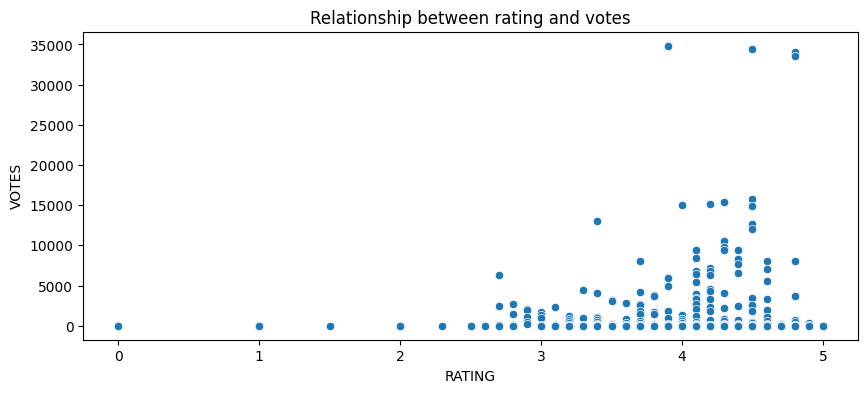

In [7]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='RATING',y='VOTES')
plt.title('Relationship between rating and votes')

In [8]:
df[['RATING','VOTES','STARS']].corr()

,RATING,VOTES,STARS
RATING,1.000000,0.163764,0.994696
VOTES,0.163764,1.000000,0.164218
STARS,0.994696,0.164218,1.000000


In [9]:
df['YEAR']=df['FILM'].apply(lambda x:x[-5:-1])
df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Number of movies per year**

In [10]:
#Movies per year
df['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

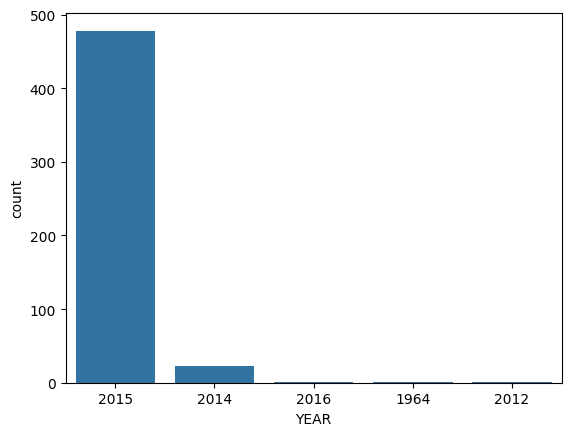

In [13]:
#Using seaborn countplot
sns.countplot(data=df,x='YEAR')

**Top 10 movies with the highest number of votes?**

In [14]:
df.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Movies with zero votes**

In [15]:
df[df['VOTES']==0].shape[0]

69

In [18]:
new_df=df[df['VOTES']>0]

In [19]:
import warnings
warnings.filterwarnings("ignore")

**KDE plots that display the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

<Axes: ylabel='Density'>

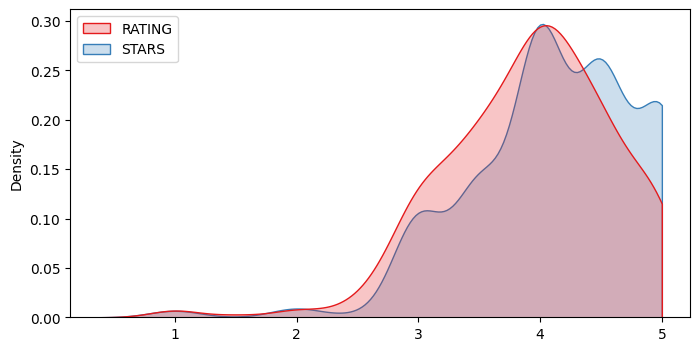

In [25]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=new_df[['RATING','STARS']],clip=[0,5],shade=True,palette='Set1')

In [26]:
new_df['STARS_DIFF']=new_df['STARS'] - new_df['RATING']
new_df['STARS_DIFF']=round(new_df['STARS_DIFF'],2)
new_df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [27]:
new_df['STARS_DIFF'].value_counts()

STARS_DIFF
0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: count, dtype: int64

**Count plot to display the number of times a certain difference occurs:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

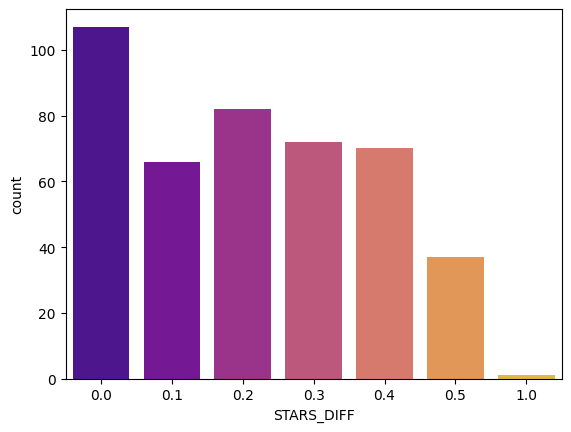

In [19]:
sns.countplot(data=new_df,x='STARS_DIFF',palette='plasma')

**The one movie that was displayed over a 1 star difference than its true rating!**

In [28]:
new_df[new_df['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites


In [29]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [30]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [31]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [32]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes


**Scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

(0.0, 100.0)

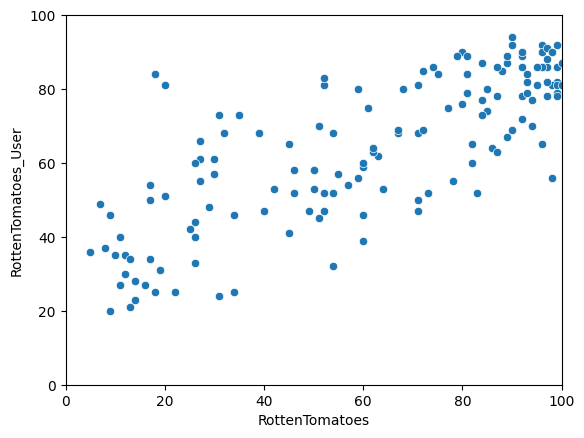

In [33]:
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

We'll create new column showing the difference bwteen the critics and the users' ratings. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.


In [34]:
all_sites['RottenTomatoes-RottenTomatoes_User']=all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

**Mean Absolute Difference between RT scores and RT User scores as described above.**

In [51]:
np.abs(all_sites['RottenTomatoes-RottenTomatoes_User']).mean()


15.095890410958905

**Distribution of the differences between RT Critics Score and RT User Score.**

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

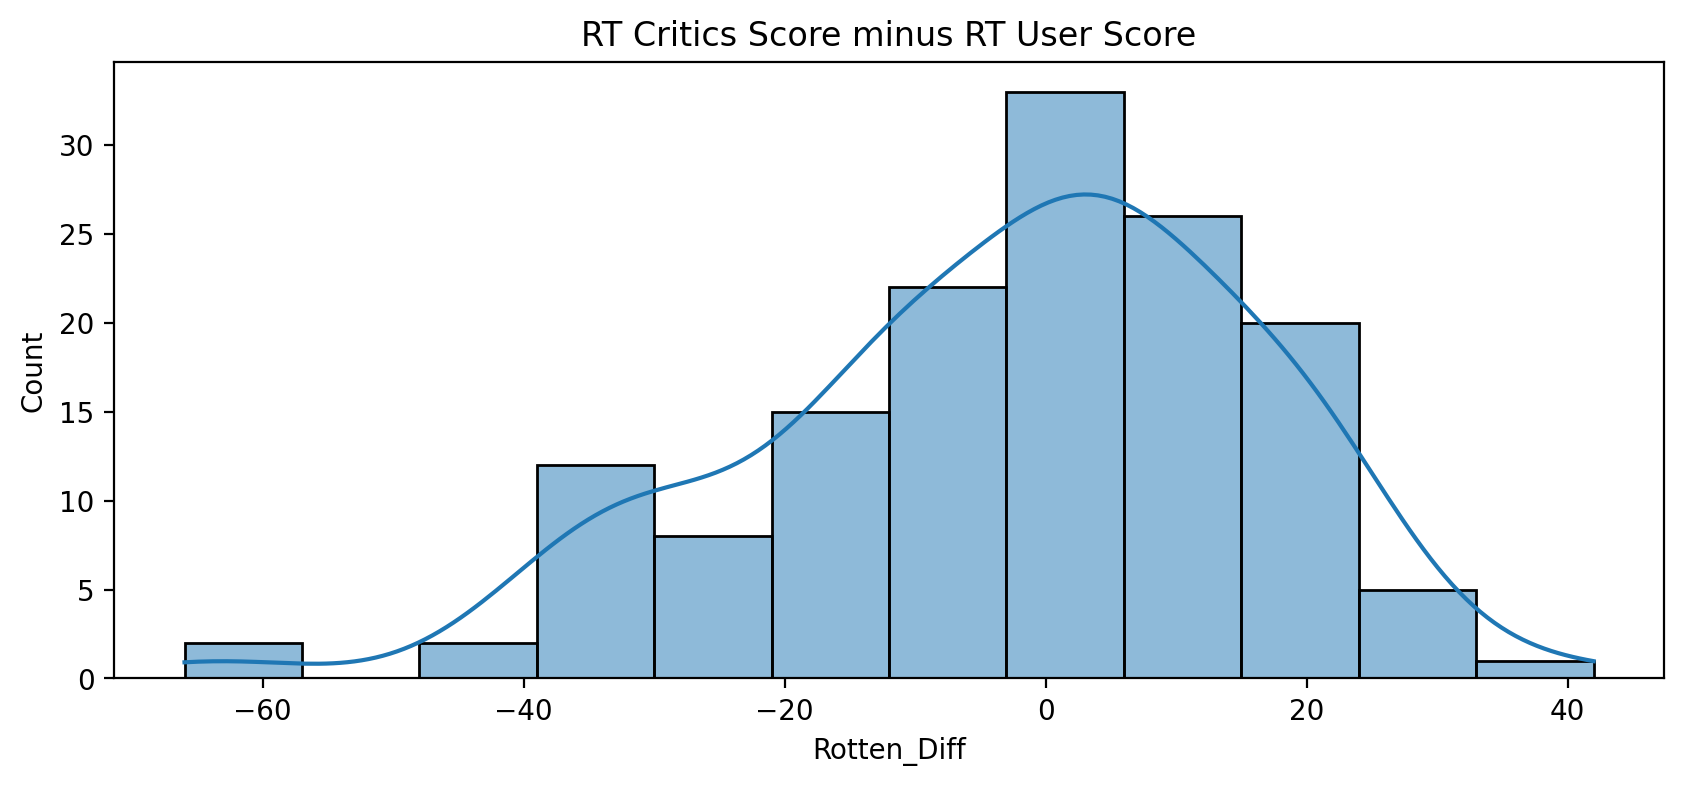

In [52]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='RottenTomatoes-RottenTomatoes_User',kde=True)
plt.xlabel('Rotten_Diff')
plt.title('RT Critics Score minus RT User Score')

**Distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

Text(0.5, 1.0, 'Abs Difference between RT Critics Score and Rt User Score')

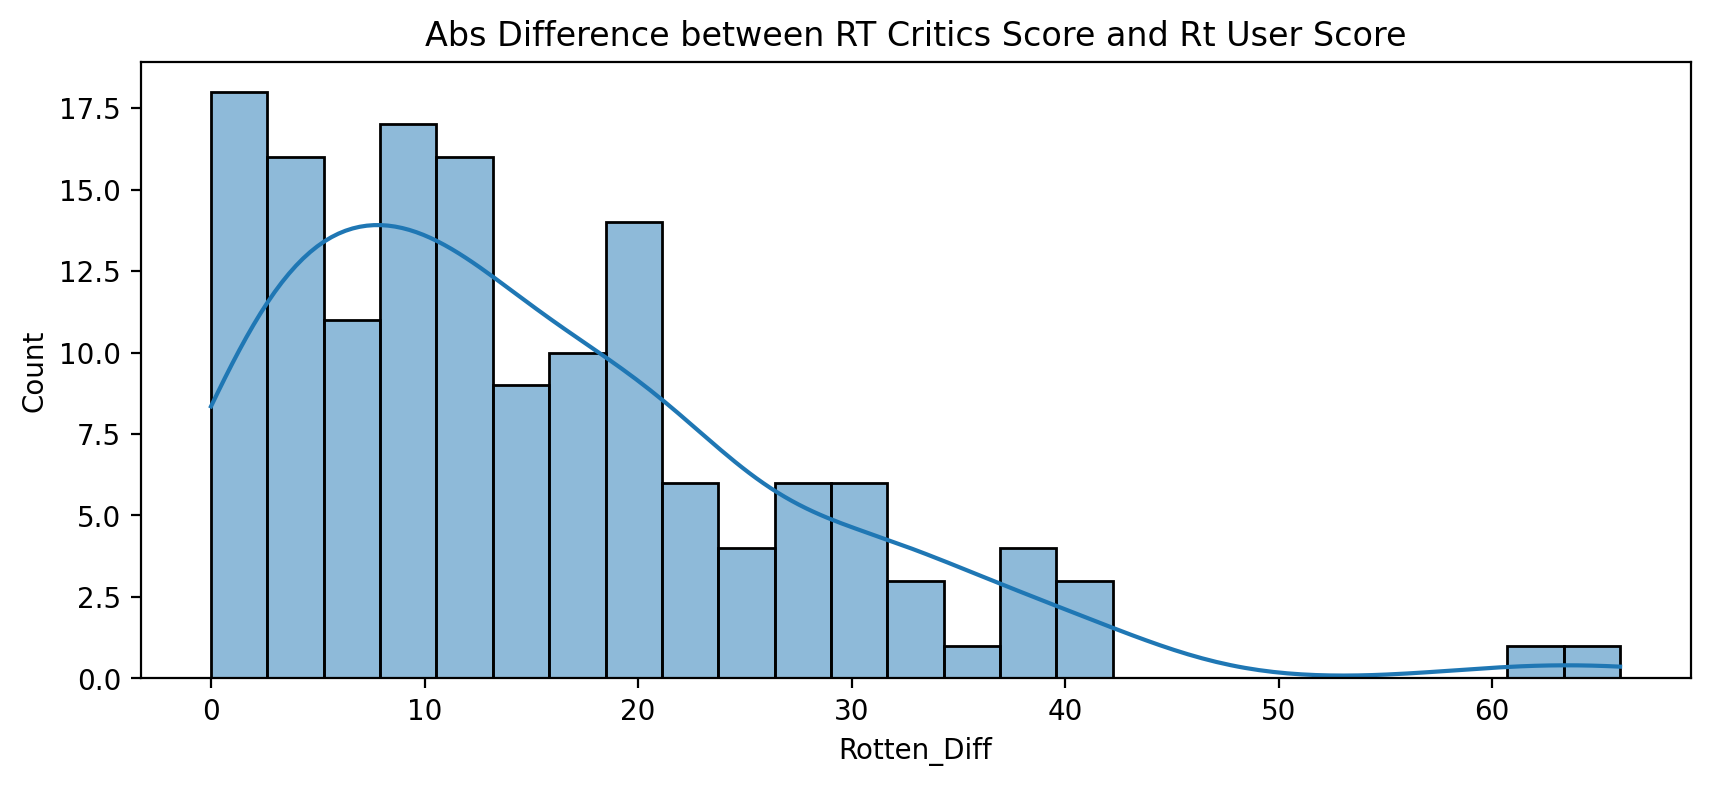

In [57]:
all_sites['RottenTomatoes-RottenTomatoes_User']=np.abs(all_sites['RottenTomatoes-RottenTomatoes_User'])
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='RottenTomatoes-RottenTomatoes_User',kde=True,bins=25)
plt.xlabel('Rotten_Diff')
plt.title('Abs Difference between RT Critics Score and Rt User Score')

**Top 5 movies users rated higher than critics on average:**

In [61]:
all_sites['Rotten_Diff']=all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'] #since we applied absolute on it in previous cells
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Top 5 movies critics scores higher than users on average:**

In [62]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic


**Scatterplot of the Metacritic Rating versus the Metacritic User rating.**

(0.0, 10.0)

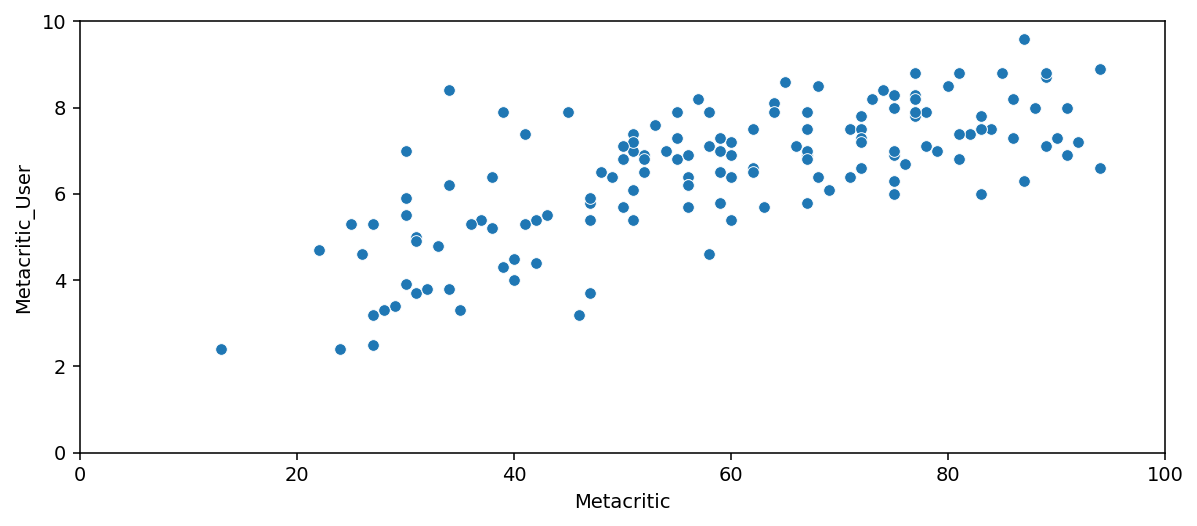

In [68]:
plt.figure(figsize=(10,4),dpi=140)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB


**Scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

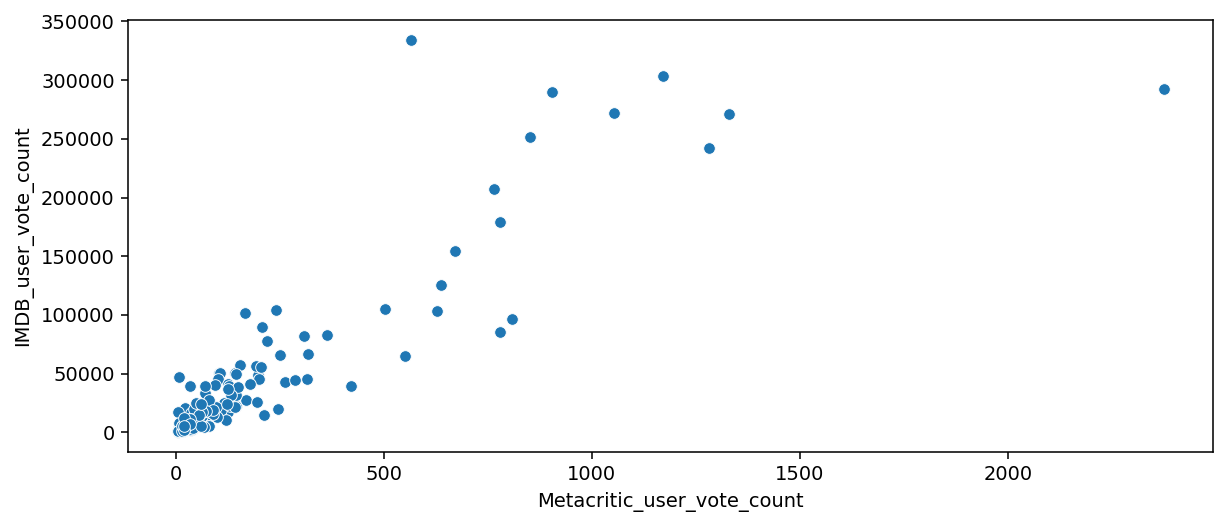

In [71]:
plt.figure(figsize=(10,4),dpi=140)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings.**

**Movie with the highest IMDB user vote count:**

In [72]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User,RRotten_Diff,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,2,-2,-2


**Movie has the highest Metacritic User Vote count:**

In [73]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User,RRotten_Diff,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

In [35]:
expanded_df= pd.merge(df,all_sites,how='inner',on='FILM')

In [36]:
expanded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   FILM                                145 non-null    object 
 1   STARS                               145 non-null    float64
 2   RATING                              145 non-null    float64
 3   VOTES                               145 non-null    int64  
 4   YEAR                                145 non-null    object 
 5   RottenTomatoes                      145 non-null    int64  
 6   RottenTomatoes_User                 145 non-null    int64  
 7   Metacritic                          145 non-null    int64  
 8   Metacritic_User                     145 non-null    float64
 9   IMDB                                145 non-null    float64
 10  Metacritic_user_vote_count          145 non-null    int64  
 11  IMDB_user_vote_count                145 non-n

In [37]:
expanded_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

Using this:
* Ratings between 0 to 100 -> divide/ 5
* Ratings between 0 and 20 -> divide/2

In [38]:
expanded_df['RT_Norm'] = np.round(expanded_df['RottenTomatoes']/20,1)
expanded_df['RTU_Norm'] =  np.round(expanded_df['RottenTomatoes_User']/20,1)

expanded_df['Meta_Norm'] =  np.round(expanded_df['Metacritic']/20,1)
expanded_df['Meta_U_Norm'] =  np.round(expanded_df['Metacritic_User']/2,1)

expanded_df['IMDB_Norm'] = np.round(expanded_df['IMDB']/2,1)

In [39]:
expanded_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes-RottenTomatoes_User,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [41]:
norm_scores=expanded_df[['FILM','STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [42]:
norm_scores=norm_scores.set_index('FILM')
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
FILM,,,,,,,
Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**KDE plot comparing the distributions of normalized ratings across all sites.**


<Axes: ylabel='Density'>

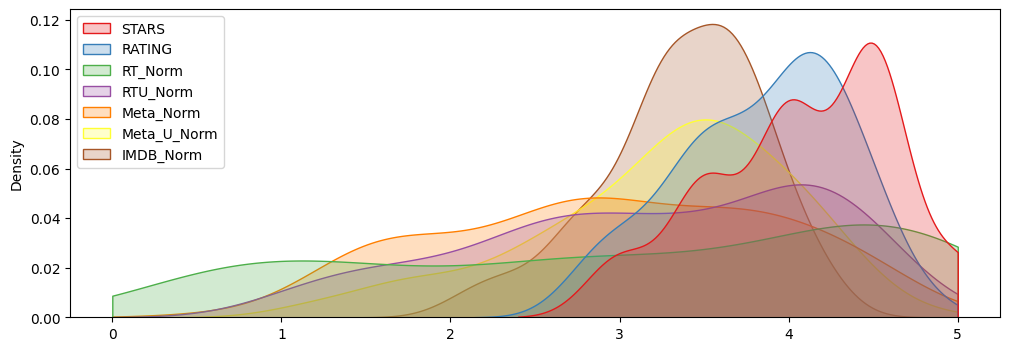

In [44]:
plt.figure(figsize=(12,4))
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

<Axes: ylabel='Density'>

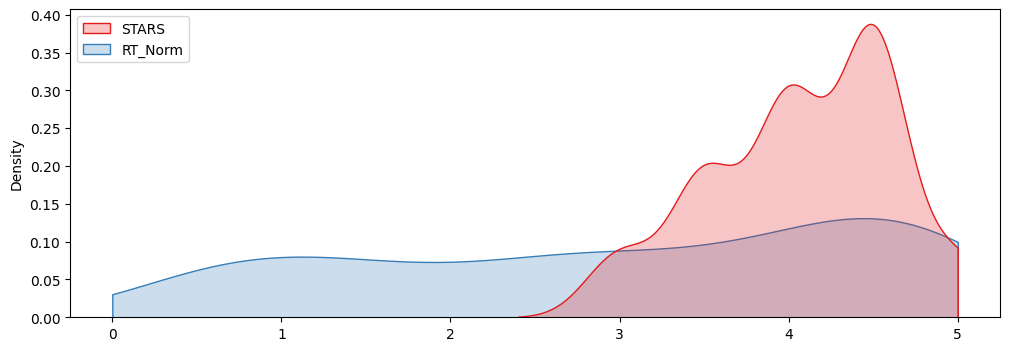

In [45]:
plt.figure(figsize=(12,4))
sns.kdeplot(data=norm_scores[['STARS','RT_Norm']],clip=[0,5],shade=True,palette='Set1')

**Histogram comparing all normalized scores.**

<Axes: ylabel='Count'>

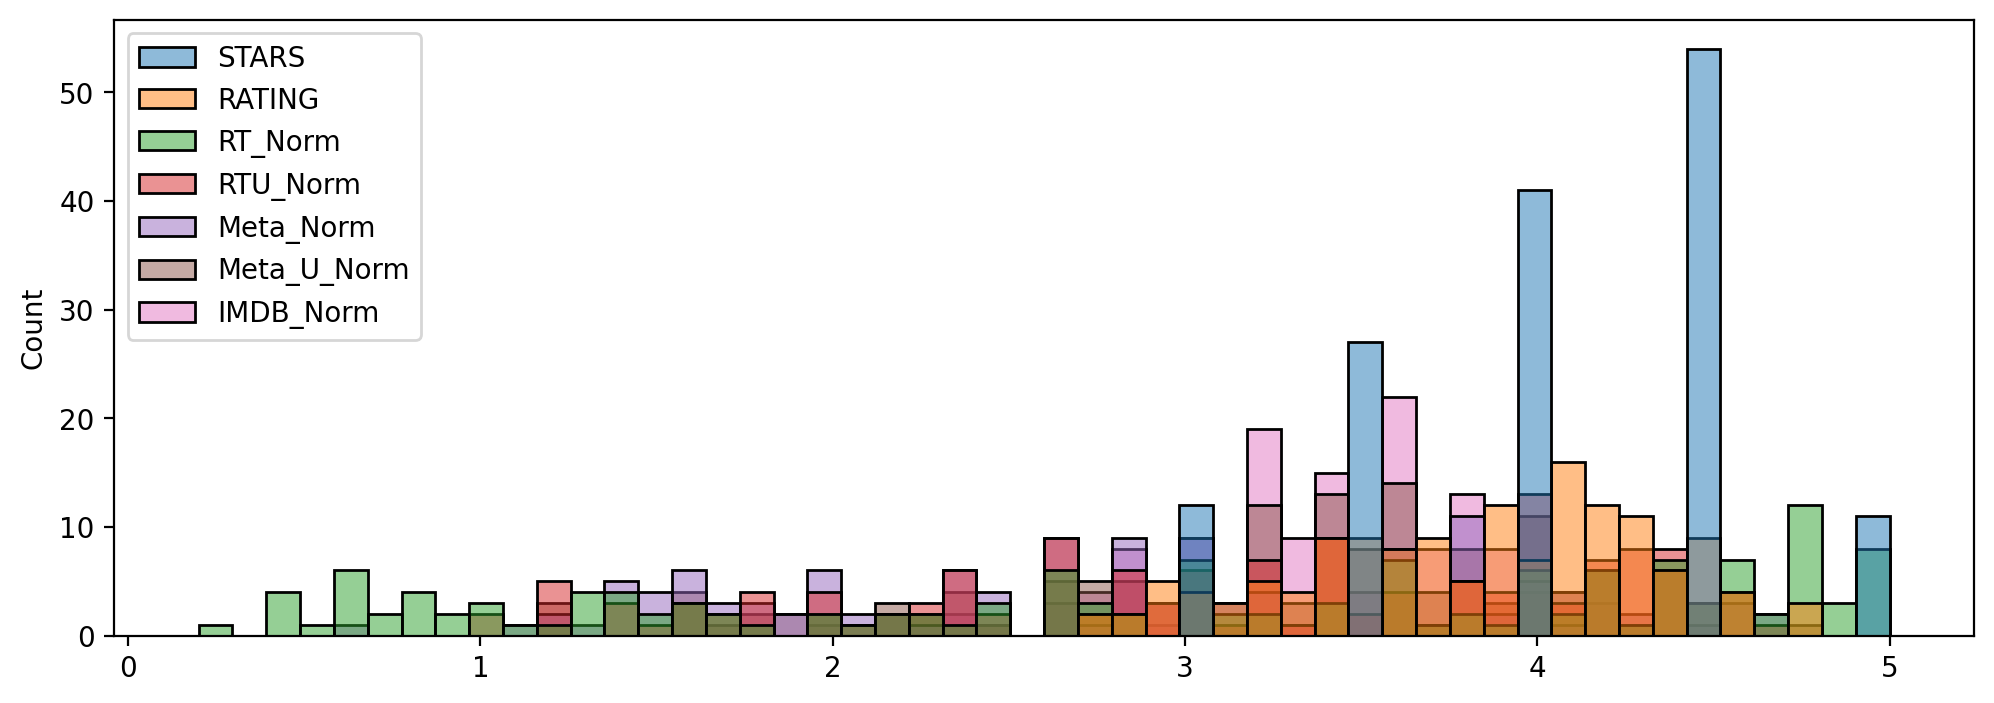

In [127]:
plt.figure(figsize=(12,4),dpi=200)
sns.histplot(data=norm_scores,bins=50)


### How are the worst movies rated across all platforms?

**Clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies.**

<Figure size 200x400 with 0 Axes>

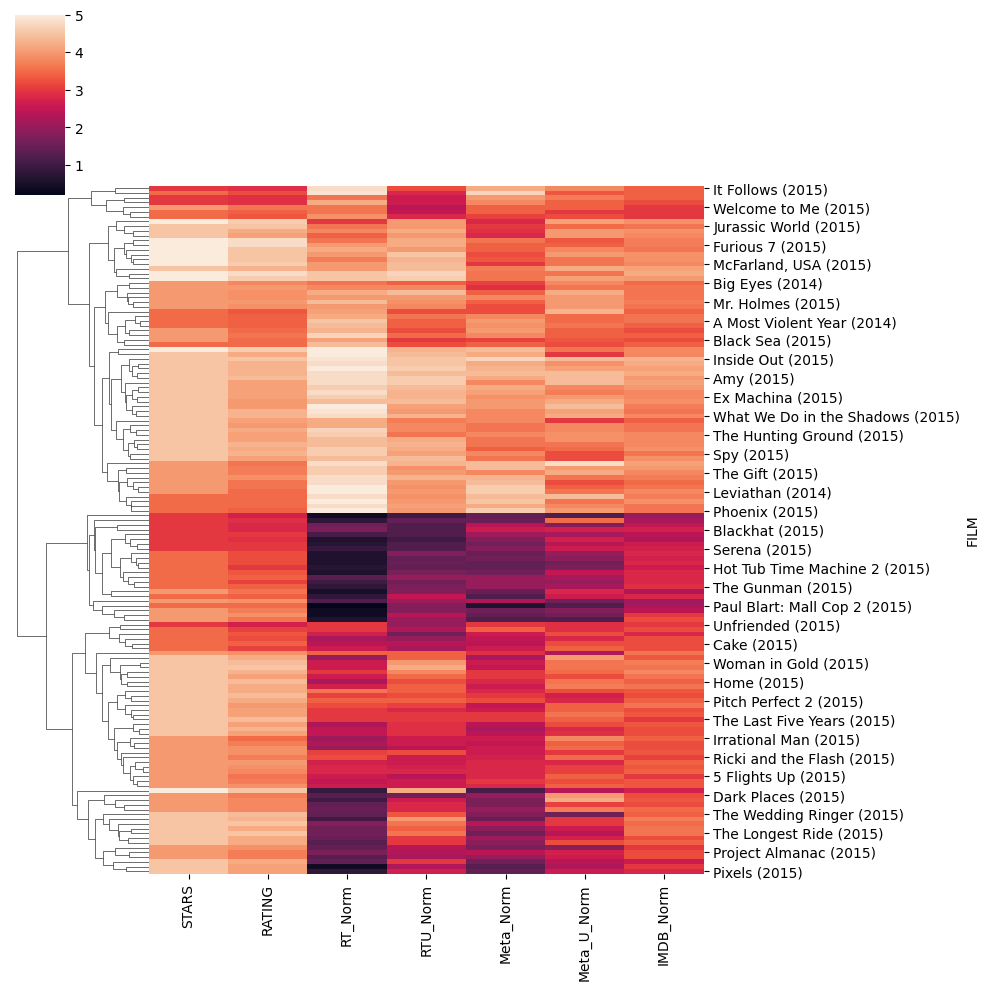

In [128]:
sns.clustermap(data=norm_scores,col_cluster=False)

**Top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings.**

In [133]:
norm_scores.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
FILM,,,,,,,
Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8


**Visualizing the distribution of ratings across all sites for the top 10 worst movies.**

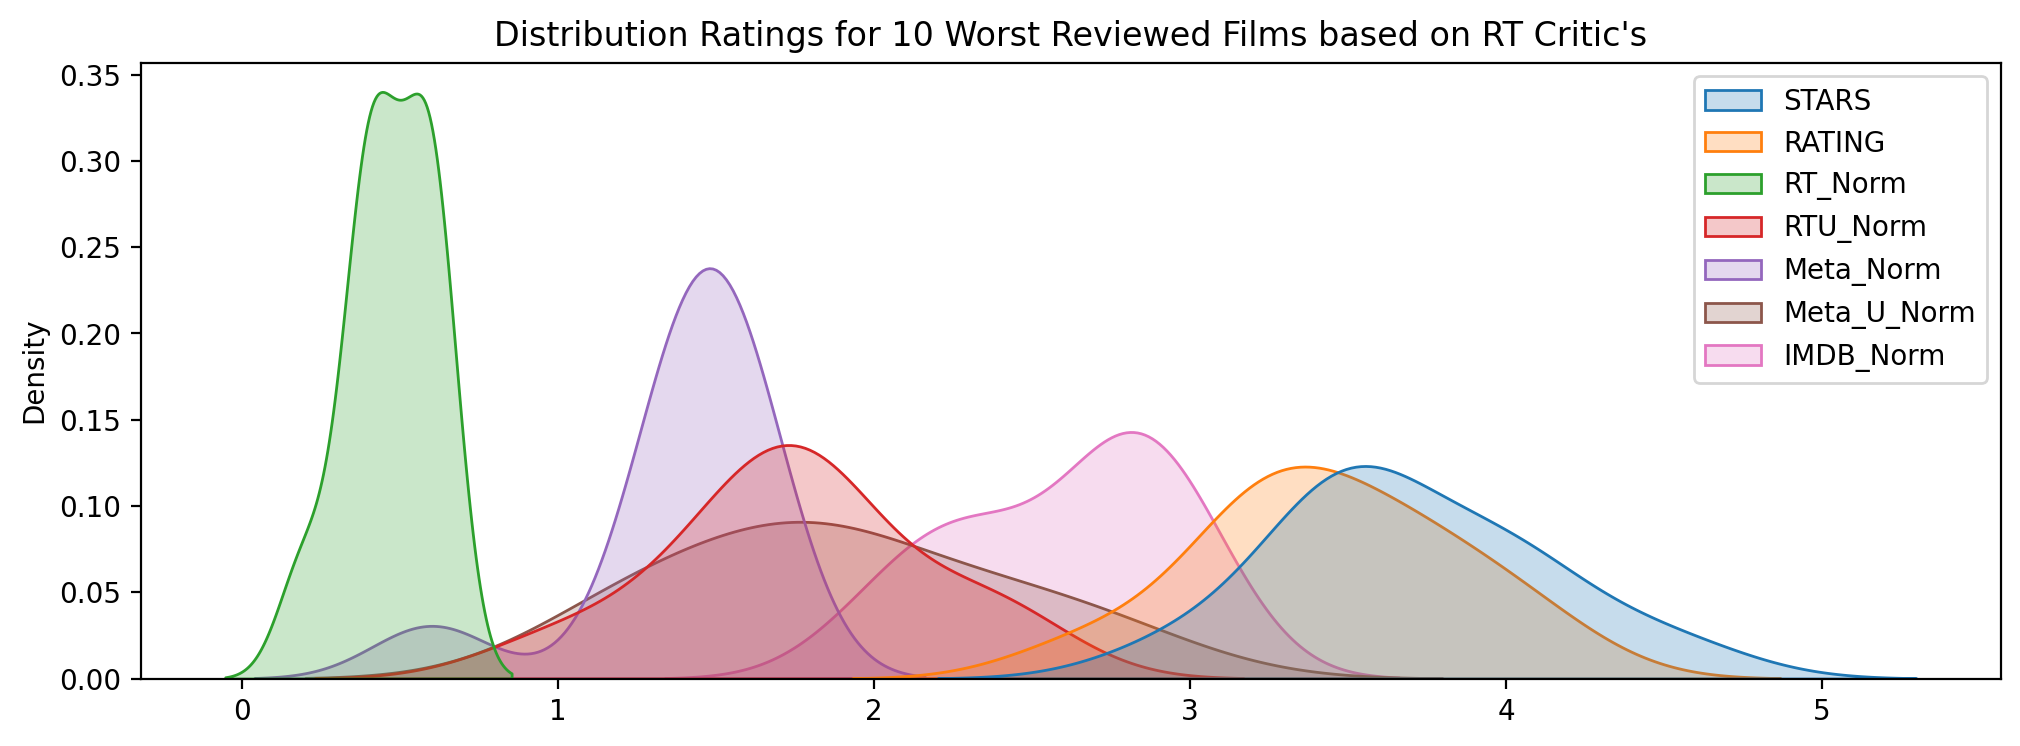

In [140]:
plt.figure(figsize=(12,4),dpi=200)
sns.kdeplot(data=norm_scores.nsmallest(10,'RT_Norm'),shade=True)
plt.title("Distribution Ratings for 10 Worst Reviewed Films based on RT Critic's");

Even though these are the top 10 worst movies, for the Fandango's rating distribution, the most frequent score was around 3.5 which is determines an average score not a bad one.

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [46]:
norm_scores.loc['Taken 3 (2015)']

STARS          4.5
RATING         4.1
RT_Norm        0.4
RTU_Norm       2.3
Meta_Norm      1.3
Meta_U_Norm    2.3
IMDB_Norm      3.0
Name: Taken 3 (2015), dtype: float64

In [47]:
0.4+2.3+1.3+2.3+3

9.3

In [48]:
9.3/5

1.86

----